In [17]:
# import libraries to work with arrays and dataframes
import numpy as np
import pandas as pd
# import math functions
import math
from scipy.stats import pearsonr
# import visualization tools
import matplotlib.pyplot as plt
import seaborn as sns
# import acquire and prepartion functions
import wrangle as w

In [15]:
def get_hist(df, exclude=['fips', 'year_built', 'lot_size_binned']):
    ''' Gets histographs of acquired continuous variables'''
    
    plt.figure(figsize=(16, 12))

    # List of columns
    cols = [col for col in df.columns if col not in exclude]

    for i, col in enumerate(cols):
        # i starts at 0, but plot nos should start at 1
        plot_number = i + 1 
        # Create subplot.
        plt.subplot(2, math.ceil(len(cols) /2), plot_number)
        # Title with column name.
        plt.title(col)
        # Display histogram for column.
        df[col].hist(bins=5)
        # Hide gridlines.
        plt.grid(False)
        # turn off scientific notation
        plt.ticklabel_format(useOffset=False)
        plt.tight_layout()
    plt.show()
        
        
def get_box(df, cols=['bedrooms','bathrooms',
                     'area','cars_garage',
                     'garage_sqft','pools','year_built',
                     'fips','region','tax_value']):
    ''' Gets boxplots of acquired continuous variables'''
    
    plt.figure(figsize=(16, 12))
    
    for i, col in enumerate(cols):
        # i starts at 0, but plot should start at 1
        plot_number = i + 1 
        # Create subplot.
        plt.subplot(2, math.ceil(len(cols) / 2,), plot_number)
        # Title with column name.
        plt.title(col)
        # Display boxplot for column.
        sns.boxplot(data=df[[col]])
        # Hide gridlines.
        plt.grid(False)
        # sets proper spacing between plots
        plt.tight_layout()
    
    
    plt.show()

In [20]:
def check_p(p, r, α=0.05):
    if p < α:
        print('there is sufficient evidence to reject our null hypothesis')
        print(f'the p-value is {p}')
        print(f'the r coeficient is {r}')
    else:
        print('we fail to reject our null hypothesis')
        print(f'the p-value is {p}')

In [2]:
train, validate, test = w.wrangle_zillow()

opening data from local file


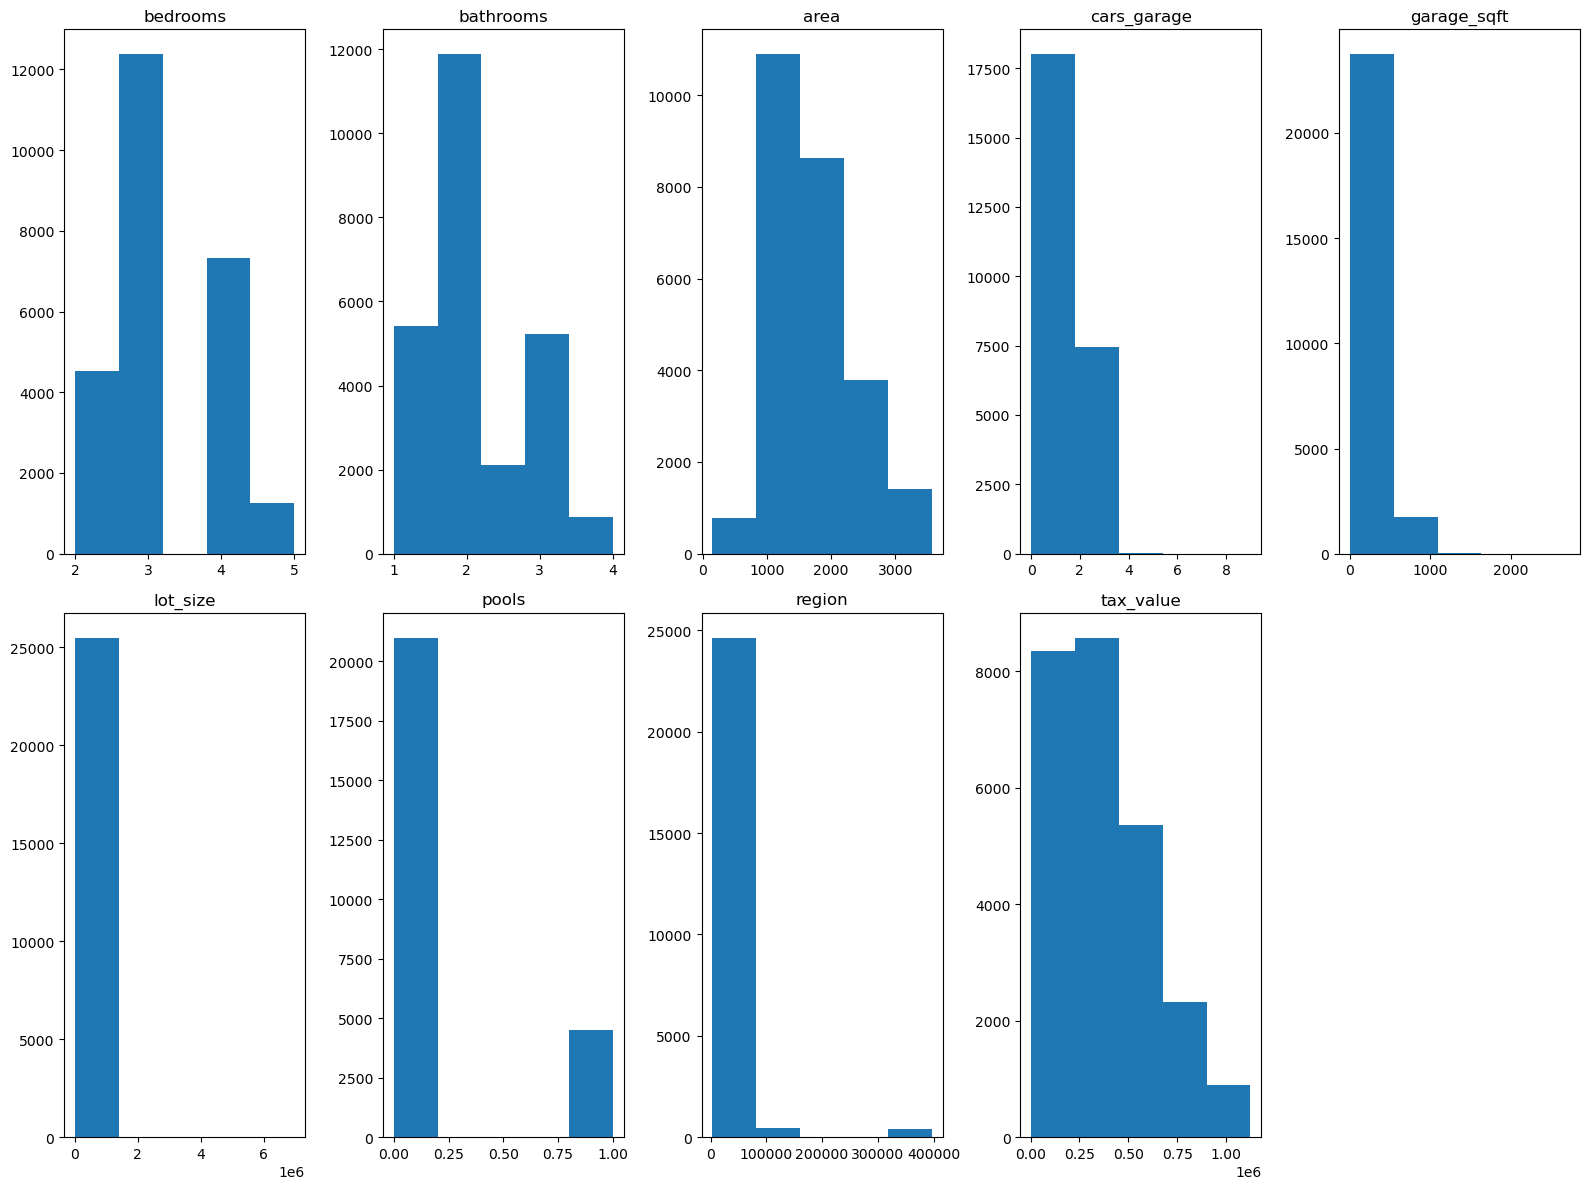

In [9]:
get_hist(train)

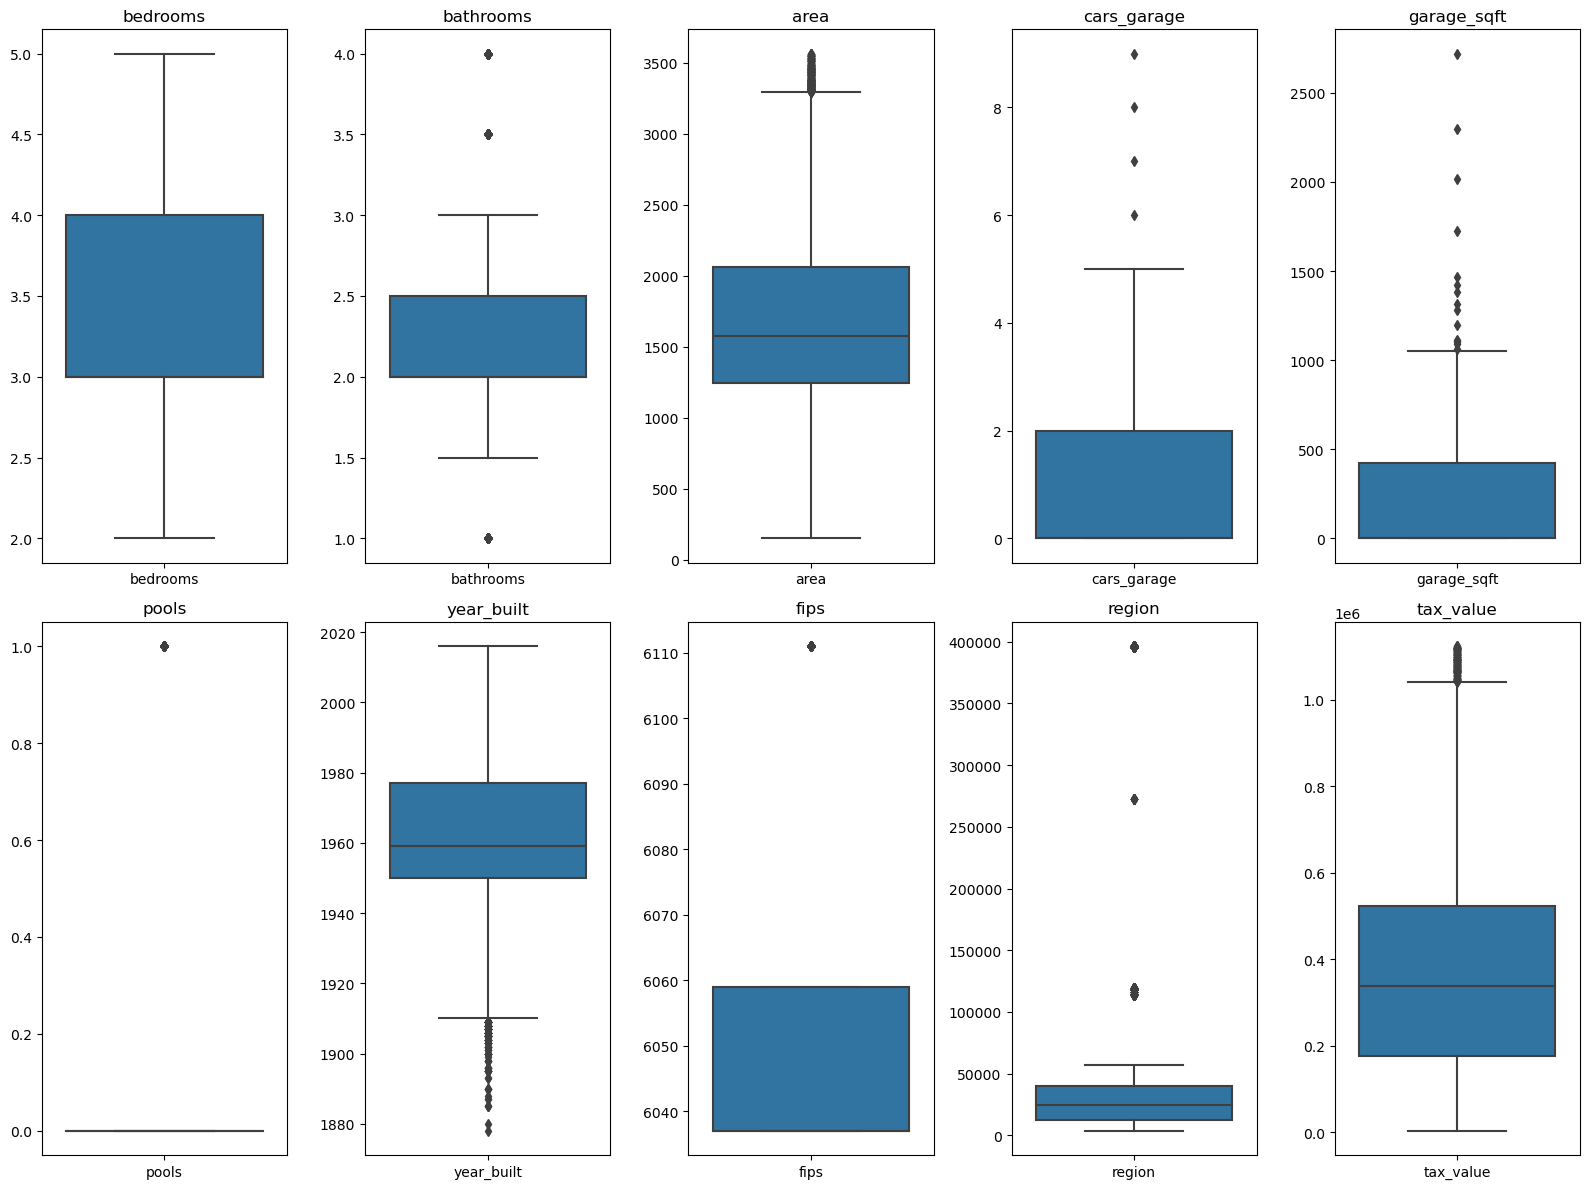

In [16]:
get_box(train)

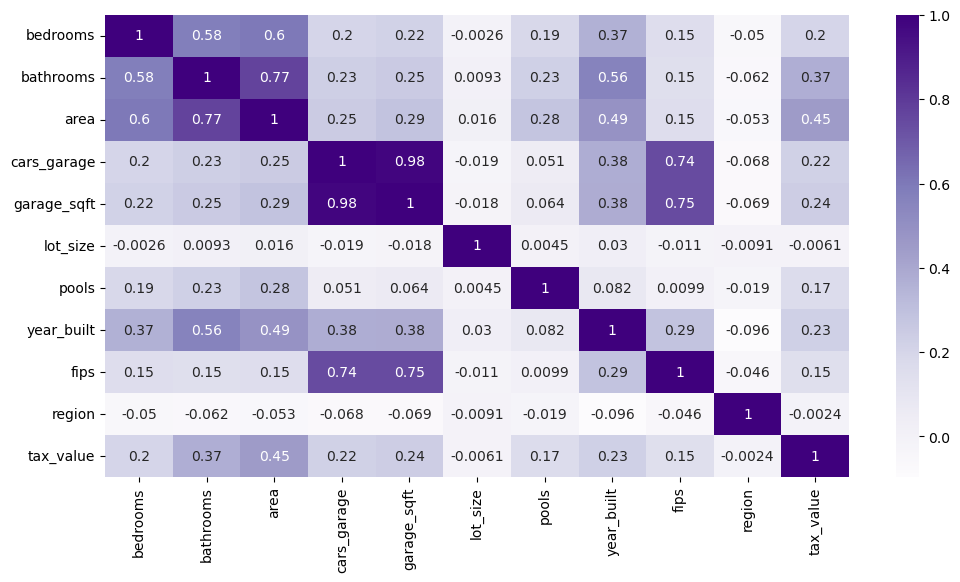

In [60]:
plt.figure(figsize=(12,6))
sns.heatmap(train.corr(), cmap='Purples', annot=True)
plt.show()

# Hypothesis
cars_garage has a linear correlation to tax_value
- H$_0$: There is no linear correlation between cars_garage and tax_value
- H$_a$: There is a linear correlation between cars_garage and tax_value
- Confidence interval / alpha: 95% / 0.05
- This will be a pearsonsr correlation test

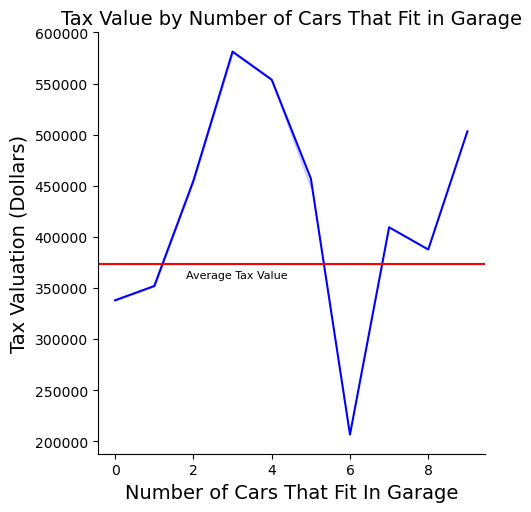

In [157]:
sns.relplot(data=train, x='cars_garage', y='tax_value', 
            kind='line', ci=False, color='blue')
plt.axhline(train.tax_value.mean(), color='red')
plt.annotate('Average Tax Value', (1.8,360000), size=8)
plt.title('Tax Value by Number of Cars That Fit in Garage', size=14)
plt.xlabel('Number of Cars That Fit In Garage', size=14)
plt.ylabel('Tax Valuation (Dollars)', size=14)
plt.show()

In [18]:
α = 0.05

In [154]:
r, p = pearsonr(train.garage_sqft, train.tax_value)

In [155]:
check_p(p,r)

there is sufficient evidence to reject our null hypothesis
the p-value is 0.0
the r coeficient is 0.24177353734407273


There is enough evidence to show that there is a linear correlation between cars_garage and tax_value, with a r coeficient of 0.22

<Figure size 1600x600 with 0 Axes>

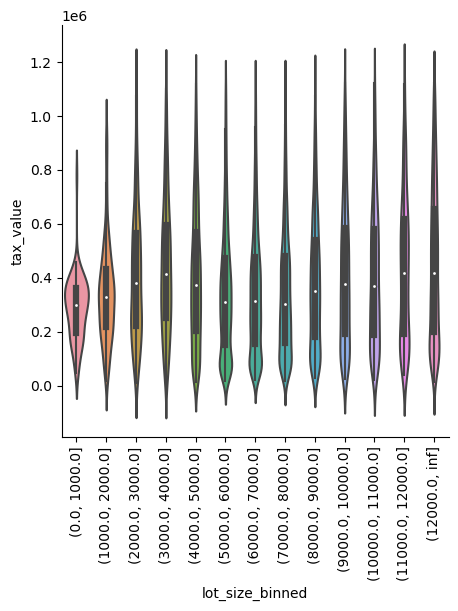

In [95]:
plt.figure(figsize=(16,6))
sns.catplot(data=train, x='lot_size_binned', y='tax_value', kind='violin')
plt.xticks(rotation=90)
plt.show()

It seems that the tax_value is pretty evenly disbursed across every lot_size bin, so probably not a good estimator or tax_value

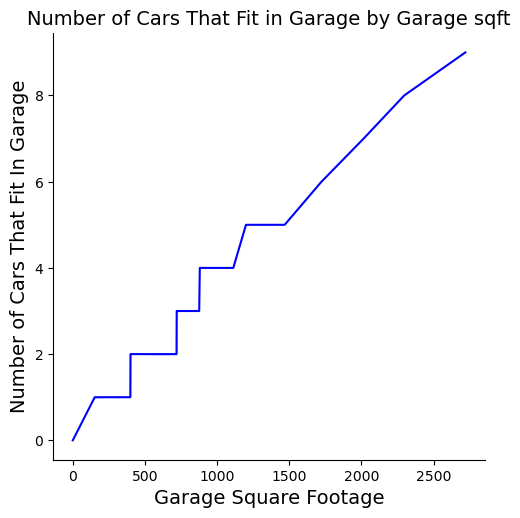

In [102]:
sns.relplot(data=train, x='garage_sqft', y='cars_garage', 
            kind='line', ci=False, color='blue')
plt.title('Number of Cars That Fit in Garage by Garage sqft', size=14)
plt.ylabel('Number of Cars That Fit In Garage', size=14)
plt.xlabel('Garage Square Footage', size=14)
plt.show()

Garage square footage appears to have a strong correlation to the number of cars that fit within the garage.

# Hypothesis
Is there a linear corellation between area of the house and the tax value?
- H$_0$: There is no correlation between area and tax value
- H$_a$: There is a linear correlation between area and tax value
- alpha: 0.05
- This will be a pearsonsr test

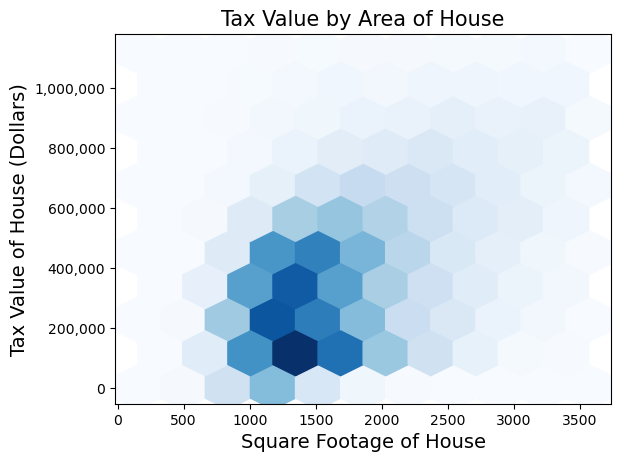

In [185]:
plt.hexbin(data=train, x='area', y='tax_value', gridsize=10, cmap='Blues')
plt.xlabel('Square Footage of House', size =14)
plt.ylabel('Tax Value of House (Dollars)', size=14)
plt.title('Tax Value by Area of House', size=15)
plt.yticks(ticks=[0,200_000,400_000,600_000,800_000,1_000_000], 
           labels=['0', '200,000', '400,000', '600,000', '800,000', '1,000,000'])
plt.show()

In [143]:
r, p = pearsonr(train.area, train.tax_value)

In [144]:
check_p(p, r)

there is sufficient evidence to reject our null hypothesis
the p-value is 0.0
the r coeficient is 0.45028158739912466


There is enough evidence to show that there is a linear relationship between the square footage (area) of the house and the tax value.